Import Libraries

In [767]:
import pandas as pd 
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import numpy as np
import seaborn as ss
import matplotlib.pyplot as plt

Import dataset into Notebook

In [768]:
academicds = pd.read_csv('academic_dataset.csv')

In [769]:
academicds.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M


 ------------------- Data Preprocessing -------------------

Shape of the Dataset

In [770]:
academicds.shape

(480, 17)

Check Data Type

In [771]:
academicds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   gender                    480 non-null    object
 1   NationalITy               480 non-null    object
 2   PlaceofBirth              480 non-null    object
 3   StageID                   480 non-null    object
 4   GradeID                   480 non-null    object
 5   SectionID                 480 non-null    object
 6   Topic                     480 non-null    object
 7   Semester                  480 non-null    object
 8   Relation                  480 non-null    object
 9   raisedhands               480 non-null    int64 
 10  VisITedResources          480 non-null    int64 
 11  AnnouncementsView         480 non-null    int64 
 12  Discussion                480 non-null    int64 
 13  ParentAnsweringSurvey     480 non-null    object
 14  ParentschoolSatisfaction  

find the null values in the dataset

In [772]:
academicds.isnull().sum()

gender                      0
NationalITy                 0
PlaceofBirth                0
StageID                     0
GradeID                     0
SectionID                   0
Topic                       0
Semester                    0
Relation                    0
raisedhands                 0
VisITedResources            0
AnnouncementsView           0
Discussion                  0
ParentAnsweringSurvey       0
ParentschoolSatisfaction    0
StudentAbsenceDays          0
Class                       0
dtype: int64

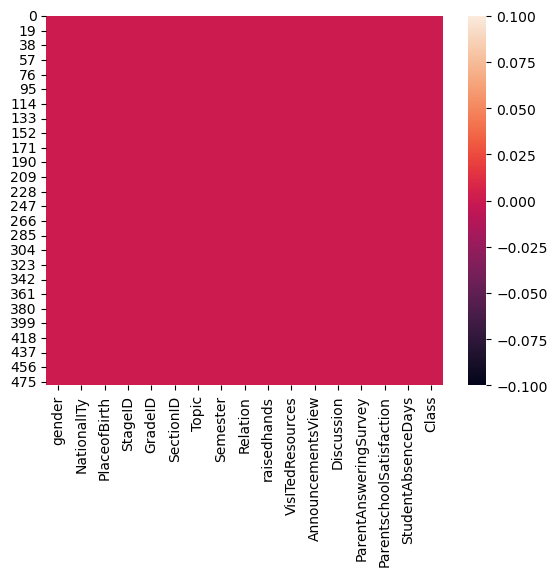

In [773]:
ss.heatmap(academicds.isnull())
plt.show()

Find the Duplicates Values

In [774]:
academicds.duplicated().sum()

2

In [775]:
duplicates = academicds[academicds.duplicated()]
print(duplicates)

    gender NationalITy PlaceofBirth     StageID GradeID SectionID   Topic  \
326      M      Jordan       Jordan  lowerlevel    G-02         A  French   
327      M      Jordan       Jordan  lowerlevel    G-02         A  French   

    Semester Relation  raisedhands  VisITedResources  AnnouncementsView  \
326        F   Father           10                15                 10   
327        S   Father           30                10                 20   

     Discussion ParentAnsweringSurvey ParentschoolSatisfaction  \
326          21                    No                      Bad   
327           5                    No                      Bad   

    StudentAbsenceDays Class  
326            Above-7     L  
327            Above-7     L  


In [776]:
academicds = academicds.drop_duplicates()

In [777]:
duplicates = academicds[academicds.duplicated()]
print(duplicates)

Empty DataFrame
Columns: [gender, NationalITy, PlaceofBirth, StageID, GradeID, SectionID, Topic, Semester, Relation, raisedhands, VisITedResources, AnnouncementsView, Discussion, ParentAnsweringSurvey, ParentschoolSatisfaction, StudentAbsenceDays, Class]
Index: []


In [778]:
academicds.shape

(478, 17)

Find the Garbage Values

In [779]:
for i in academicds.select_dtypes(include="object").columns:
    print(academicds[i].value_counts())
    print(" ")
    print(" ")

gender
M    303
F    175
Name: count, dtype: int64
 
 
NationalITy
KW             179
Jordan         170
Palestine       28
Iraq            22
lebanon         17
Tunis           12
SaudiArabia     11
Egypt            9
Syria            7
USA              6
Iran             6
Lybia            6
Morocco          4
venzuela         1
Name: count, dtype: int64
 
 
PlaceofBirth
KuwaIT         180
Jordan         174
Iraq            22
lebanon         19
SaudiArabia     16
USA             16
Palestine       10
Egypt            9
Tunis            9
Iran             6
Syria            6
Lybia            6
Morocco          4
venzuela         1
Name: count, dtype: int64
 
 
StageID
MiddleSchool    248
lowerlevel      197
HighSchool       33
Name: count, dtype: int64
 
 
GradeID
G-02    145
G-08    116
G-07    101
G-04     48
G-06     32
G-11     13
G-12     11
G-09      5
G-10      4
G-05      3
Name: count, dtype: int64
 
 
SectionID
A    281
B    167
C     30
Name: count, dtype: int64
 
 
Topic

Correct Typographical Errors and Standardize Values

In [780]:
academicds['PlaceofBirth'] = academicds['PlaceofBirth'].replace({
    'KuwaIT': 'Kuwait',
    'venzuela': 'Venezuela'
})

academicds['Relation'] = academicds['Relation'].replace({
    'Mum': 'Mother',
})

academicds['NationalITy'] = academicds['NationalITy'].replace({
    'KW': 'Kuwait',
    'venzuela': 'Venezuela',
})

In [781]:
for i in academicds.select_dtypes(include="object").columns:
    print(academicds[i].value_counts())
    print(" ")
    print(" ")

gender
M    303
F    175
Name: count, dtype: int64
 
 
NationalITy
Kuwait         179
Jordan         170
Palestine       28
Iraq            22
lebanon         17
Tunis           12
SaudiArabia     11
Egypt            9
Syria            7
USA              6
Iran             6
Lybia            6
Morocco          4
Venezuela        1
Name: count, dtype: int64
 
 
PlaceofBirth
Kuwait         180
Jordan         174
Iraq            22
lebanon         19
SaudiArabia     16
USA             16
Palestine       10
Egypt            9
Tunis            9
Iran             6
Syria            6
Lybia            6
Morocco          4
Venezuela        1
Name: count, dtype: int64
 
 
StageID
MiddleSchool    248
lowerlevel      197
HighSchool       33
Name: count, dtype: int64
 
 
GradeID
G-02    145
G-08    116
G-07    101
G-04     48
G-06     32
G-11     13
G-12     11
G-09      5
G-10      4
G-05      3
Name: count, dtype: int64
 
 
SectionID
A    281
B    167
C     30
Name: count, dtype: int64
 
 
Topic

Get an overview of your dataset's distribution

In [782]:
academicds.describe(include='all')

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
count,478,478,478,478,478,478,478,478,478,478.000000,478.000000,478.000000,478.000000,478,478,478,478
unique,2,14,14,3,10,3,12,2,2,NaN,NaN,NaN,NaN,2,2,2,3
top,M,Kuwait,Kuwait,MiddleSchool,G-02,A,IT,F,Father,NaN,NaN,NaN,NaN,Yes,Good,Under-7,M
freq,303,179,180,248,145,281,95,244,281,NaN,NaN,NaN,NaN,270,292,289,211
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,46.887029,54.974895,38.014644,43.410042,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.787903,33.035071,26.623507,27.620961,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,1.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.000000,20.000000,14.250000,20.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50.000000,65.000000,33.000000,39.500000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,75.000000,84.000000,58.000000,70.000000,NaN,NaN,NaN,NaN


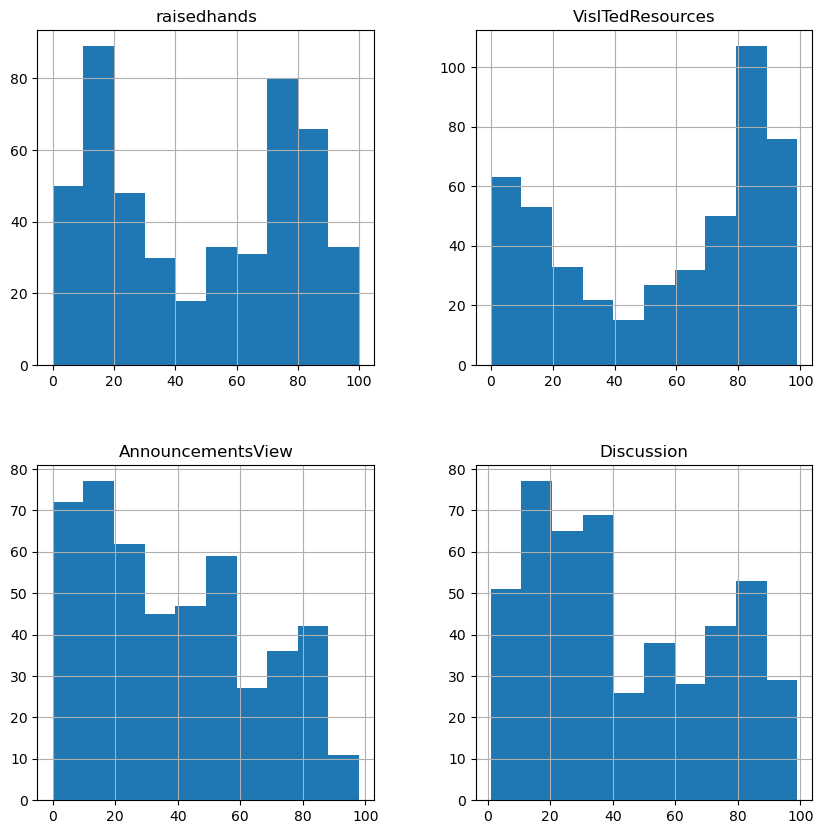

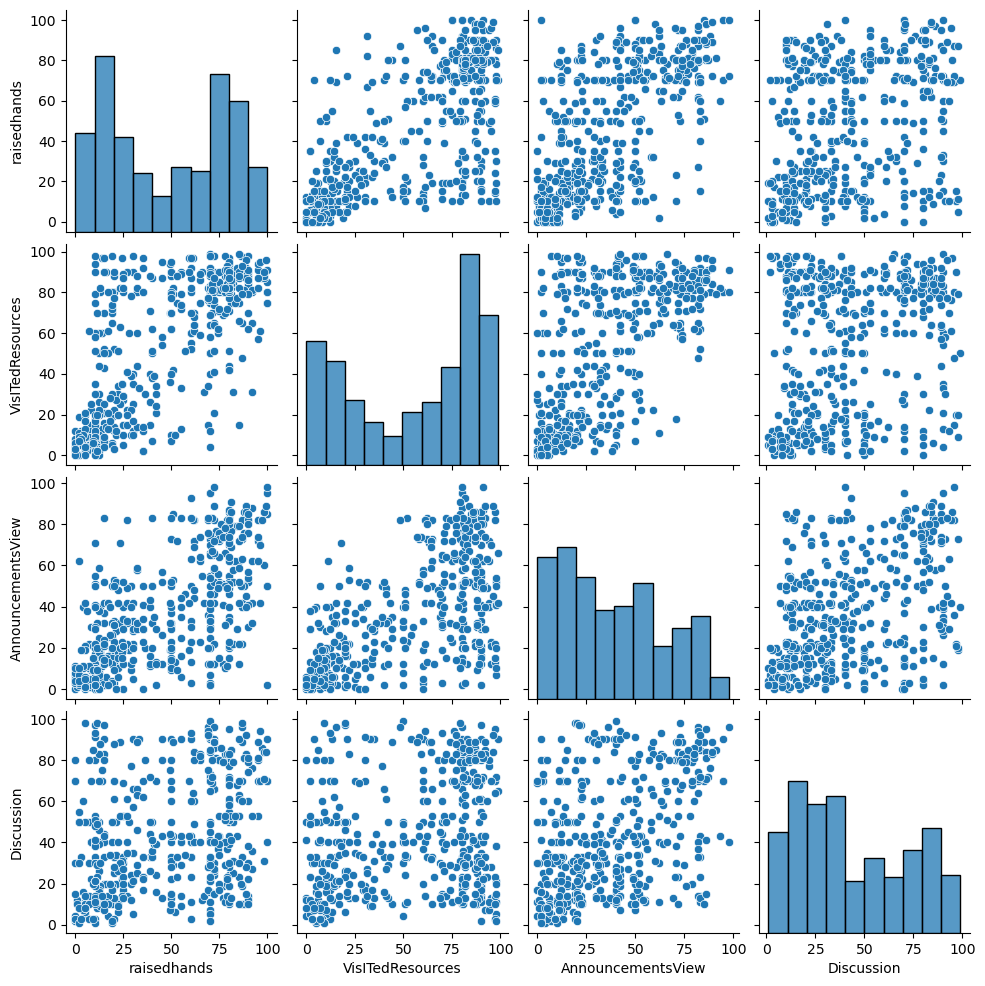

In [783]:
# Data Visualization
academicds.hist(figsize=(10, 10))
plt.show()

ss.pairplot(academicds)
plt.show()

Encoding categorical variables

In [784]:
categorical = academicds.select_dtypes(include=['object', 'category']).columns
print(categorical)

Index(['gender', 'NationalITy', 'PlaceofBirth', 'StageID', 'GradeID',
       'SectionID', 'Topic', 'Semester', 'Relation', 'ParentAnsweringSurvey',
       'ParentschoolSatisfaction', 'StudentAbsenceDays', 'Class'],
      dtype='object')


In [785]:
# Encode categorical data(set categorical data into numerical data)
encorder = LabelEncoder() 

for col in categorical:
    academicds[col] = encorder.fit_transform(academicds[col])

In [786]:
academicds.head(10)

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,1,4,4,2,1,0,7,0,0,15,16,2,20,1,1,1,2
1,1,4,4,2,1,0,7,0,0,20,20,3,25,1,1,1,2
2,1,4,4,2,1,0,7,0,0,10,7,0,30,0,0,0,1
3,1,4,4,2,1,0,7,0,0,30,25,5,35,0,0,0,1
4,1,4,4,2,1,0,7,0,0,40,50,12,50,0,0,0,2
5,0,4,4,2,1,0,7,0,0,42,30,13,70,1,0,0,2
6,1,4,4,1,4,0,8,0,0,35,12,0,17,0,0,0,1
7,1,4,4,1,4,0,8,0,0,50,10,15,22,1,1,1,2
8,0,4,4,1,4,0,8,0,0,12,21,16,50,1,1,1,2
9,0,4,4,1,4,1,7,0,0,70,80,25,70,1,1,1,2


Calculate the correlation

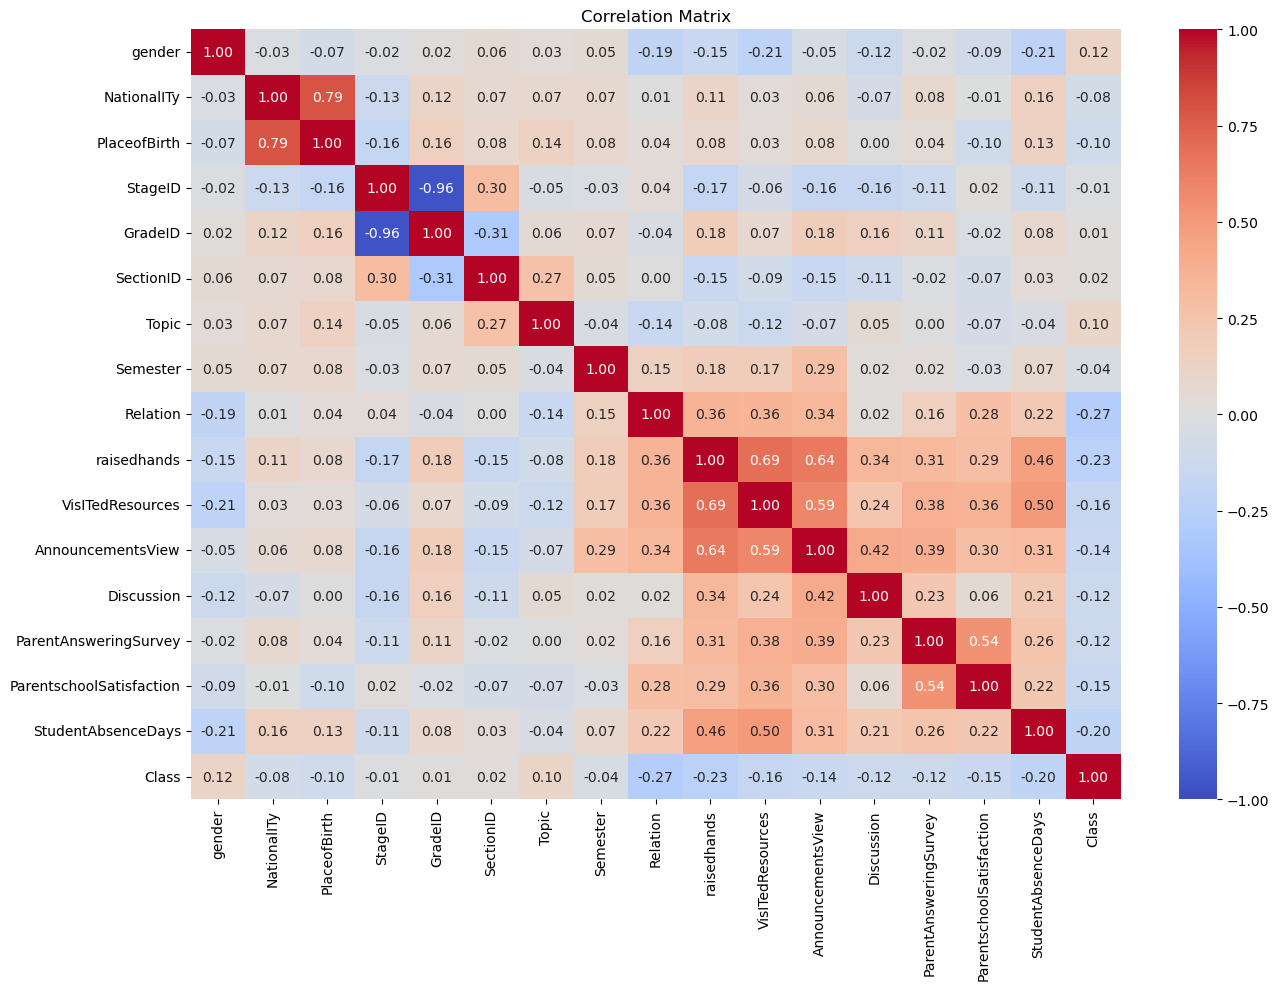

In [787]:
correlation_matrix = academicds.corr()

# heatmap
plt.figure(figsize=(15, 10))
ss.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

 Scaling numerical features

In [788]:
numerical = academicds.select_dtypes(include=['int64', 'float64']).columns
print(numerical)

Index(['raisedhands', 'VisITedResources', 'AnnouncementsView', 'Discussion'], dtype='object')


Use Min-Max Scaler

In [789]:
min_max_scaler = MinMaxScaler()

# Fit  the numerical columns
academicds[numerical] = min_max_scaler.fit_transform(academicds[numerical])

In [790]:
academicds.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,1,4,4,2,1,0,7,0,0,0.15,0.161616,0.020408,0.193878,1,1,1,2
1,1,4,4,2,1,0,7,0,0,0.20,0.202020,0.030612,0.244898,1,1,1,2
2,1,4,4,2,1,0,7,0,0,0.10,0.070707,0.000000,0.295918,0,0,0,1
3,1,4,4,2,1,0,7,0,0,0.30,0.252525,0.051020,0.346939,0,0,0,1
4,1,4,4,2,1,0,7,0,0,0.40,0.505051,0.122449,0.500000,0,0,0,2


Split the dataset into training and validation sets

In [791]:
X = academicds.iloc[:, :-1]
y = academicds.iloc[:, -1] 

In [792]:
X_train, X_val, y_train, y_val = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=42
)

Model Design

Create a deep learning model using Sequential

Model 01

Testing Learning Rate: 0.0001, Batch Size: 16
Accuracy: 0.4688


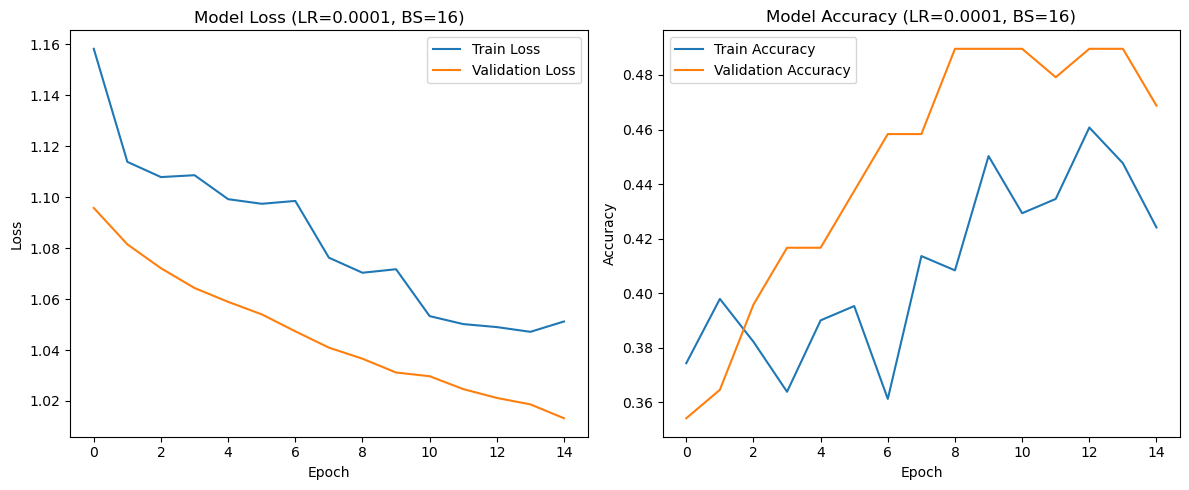

Testing Learning Rate: 0.0001, Batch Size: 32
Accuracy: 0.4479


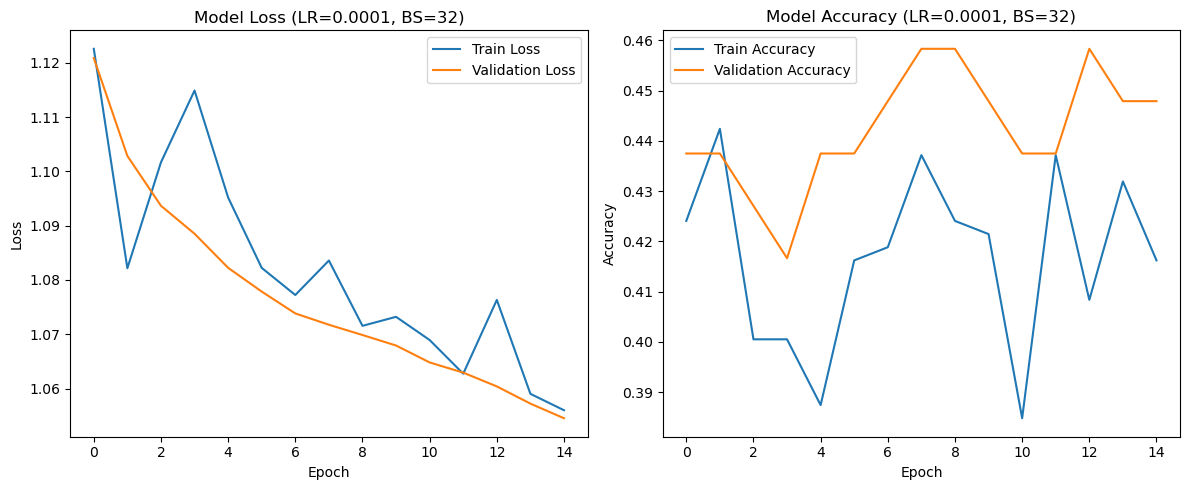

Testing Learning Rate: 0.0001, Batch Size: 64
Accuracy: 0.4792


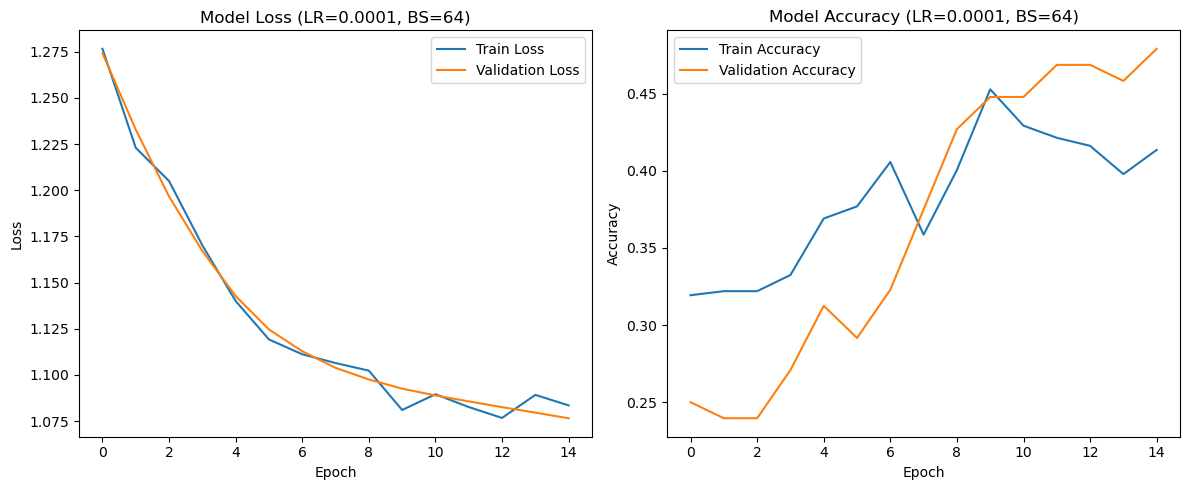

Testing Learning Rate: 0.0005, Batch Size: 16
Accuracy: 0.6979


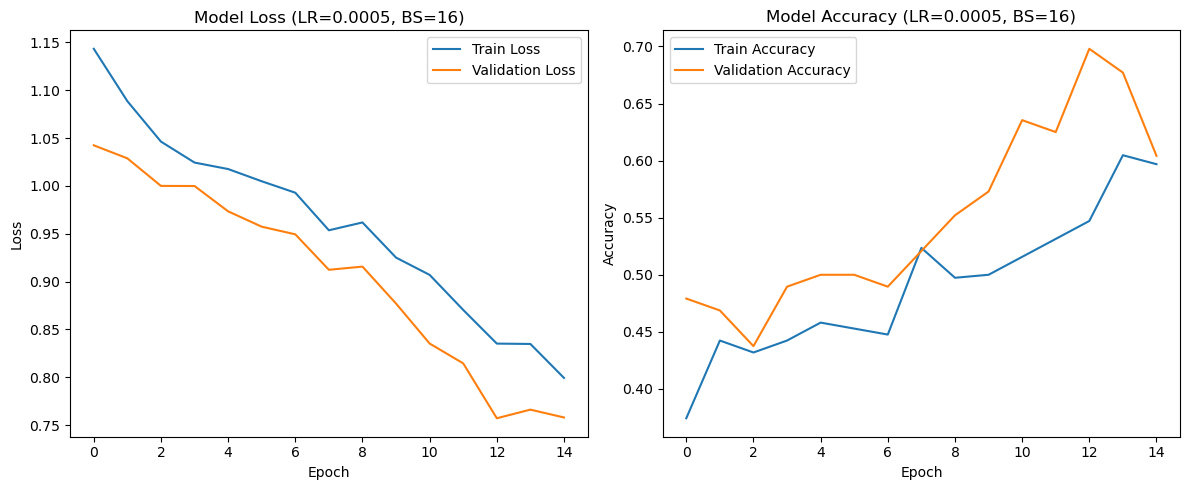

Testing Learning Rate: 0.0005, Batch Size: 32
Accuracy: 0.6354


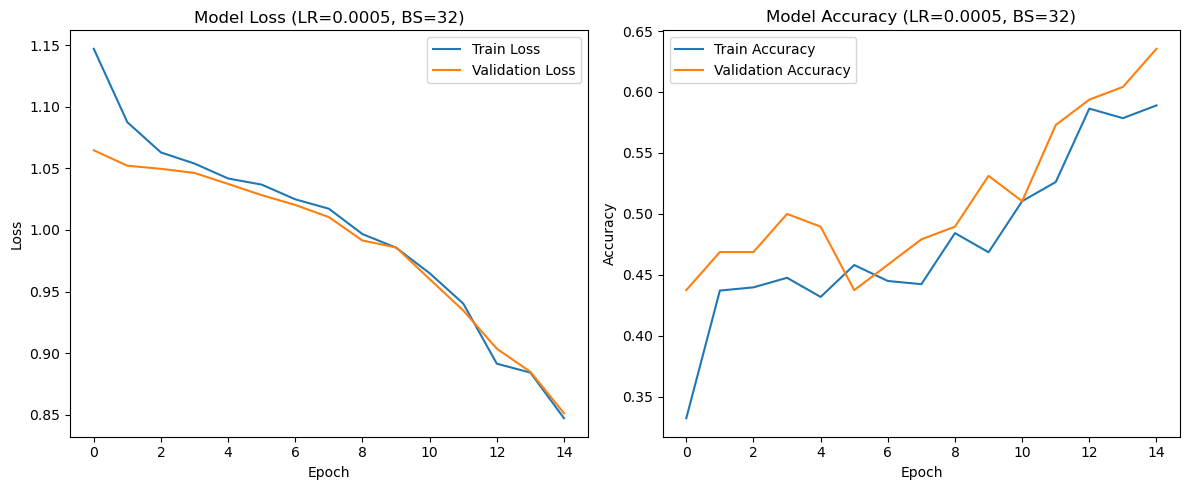

Testing Learning Rate: 0.0005, Batch Size: 64
Accuracy: 0.5312


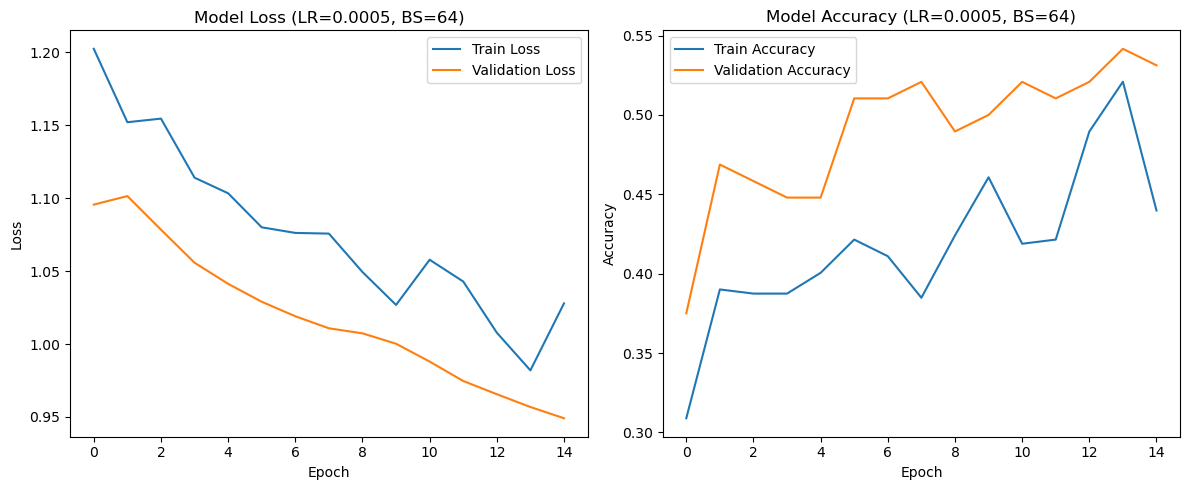

Testing Learning Rate: 0.001, Batch Size: 16
Accuracy: 0.7292


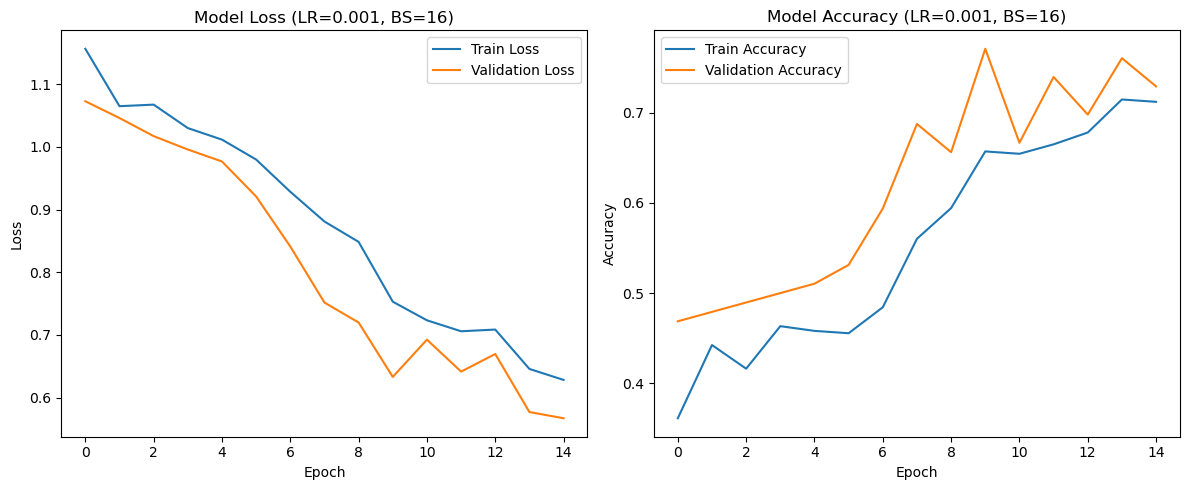

Testing Learning Rate: 0.001, Batch Size: 32
Accuracy: 0.7604


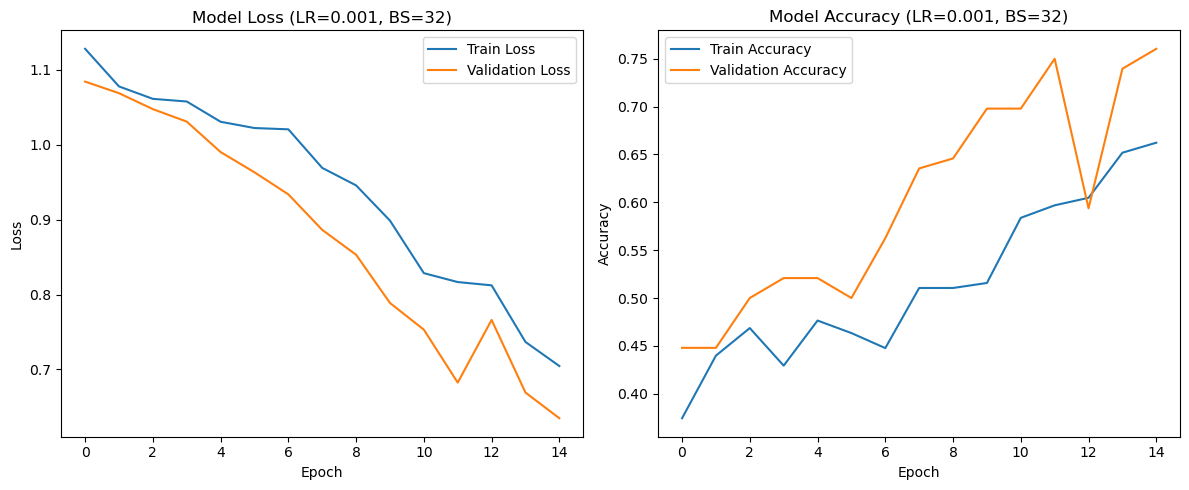

Testing Learning Rate: 0.001, Batch Size: 64
Accuracy: 0.6979


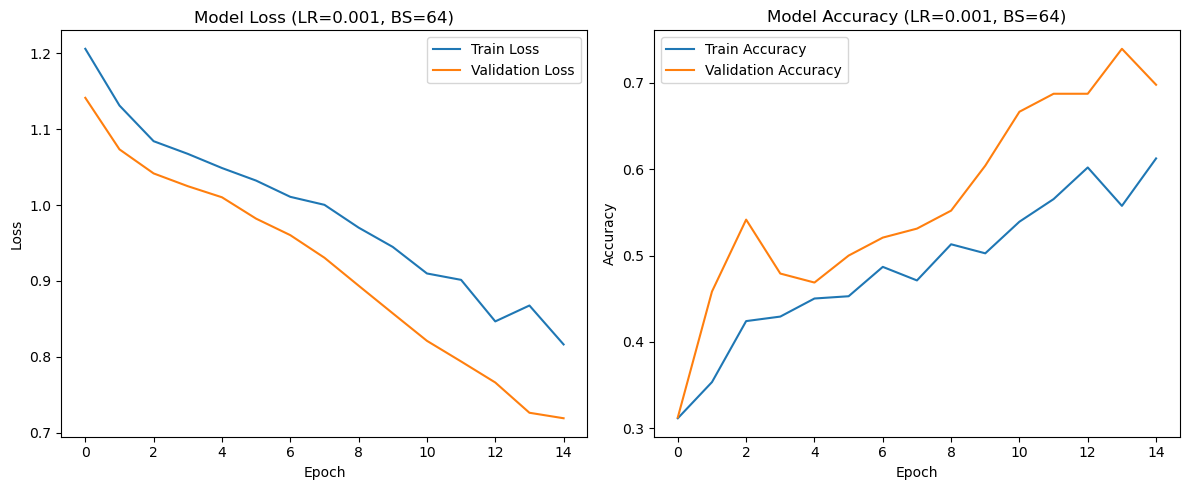

Best Hyperparameters: Learning Rate = 0.001, Batch Size = 32
3/3 - 0s - 21ms/step - accuracy: 0.7604 - loss: 0.6347
Final Model Evaluation: [0.6347066164016724, 0.7604166865348816]
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step 
************************************************************
Best Hyperparameters: Learning Rate = 0.001, Batch Size = 32
Best Accuracy: 0.7604
Best Precision: 0.7612
Best Recall: 0.7604
Best F1 Score: 0.7601
Best Log Loss: 0.6347


In [818]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score, log_loss
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping

# Define hyperparameter values 
learning_rates = [0.0001, 0.0005, 0.001]
batch_sizes = [16, 32, 64]

def build_and_train_model(learning_rate, batch_size):
    # Build the model
    model = Sequential([
        Input(shape=(X_train.shape[1],)),
        Dense(64, activation='relu'),
        Dropout(0.1),
        Dense(64, activation='relu'),
        Dropout(0.1),
        Dense(32, activation='relu'),
        Dropout(0.1),
        Dense(32, activation='relu'),
        Dense(num_classes, activation='softmax')
    ])

    # Compile the model
    model.compile(
        loss='sparse_categorical_crossentropy',
        optimizer=Adam(learning_rate=learning_rate),
        metrics=['accuracy']
    )

    # Handling Overfitting
    early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

    # Train the model
    history = model.fit(
        X_train, y_train,
        epochs=15,
        batch_size=batch_size,
        validation_data=(X_val, y_val),
        callbacks=[early_stopping],
        verbose=0
    )

    # Evaluate the model
    eval_result = model.evaluate(X_val, y_val, verbose=0)
    
    # Return evaluation result and training history
    return eval_result[1], history, model

# Initialize variables
best_accuracy = 0
best_hyperparameters = None
best_model = None

# Perform hyperparameter tuning
for lr in learning_rates:
    for bs in batch_sizes:
        print(f"Testing Learning Rate: {lr}, Batch Size: {bs}")
        accuracy, history, model = build_and_train_model(lr, bs)
        print(f"Accuracy: {accuracy:.4f}")

        # Plot loss and accuracy
        plt.figure(figsize=(12, 5))

        plt.subplot(1, 2, 1)
        plt.plot(history.history['loss'], label='Train Loss')
        plt.plot(history.history['val_loss'], label='Validation Loss')
        plt.title(f'Model Loss (LR={lr}, BS={bs})')
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.legend()

        plt.subplot(1, 2, 2)
        plt.plot(history.history['accuracy'], label='Train Accuracy')
        plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
        plt.title(f'Model Accuracy (LR={lr}, BS={bs})')
        plt.xlabel('Epoch')
        plt.ylabel('Accuracy')
        plt.legend()

        plt.tight_layout()
        plt.show()

        # Track the best performance
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_hyperparameters = (lr, bs)
            best_model = model

# Display best hyperparameters and accuracy
print(f"Best Hyperparameters: Learning Rate = {best_hyperparameters[0]}, Batch Size = {best_hyperparameters[1]}")

# Evaluate the final model
eval_final = best_model.evaluate(X_val, y_val, verbose=2)
print("Final Model Evaluation:", eval_final)

# Predict on validation data
y_val_pred_proba = best_model.predict(X_val)

# Convert probabilities to class predictions
y_val_pred = np.argmax(y_val_pred_proba, axis=1)
y_val_true = y_val

# Calculate metrics
accuracy = np.mean(y_val_pred == y_val)
precision = precision_score(y_val_true, y_val_pred, average='weighted')
recall = recall_score(y_val_true, y_val_pred, average='weighted')
f1 = f1_score(y_val_true, y_val_pred, average='weighted')
loss = log_loss(y_val_true, y_val_pred_proba)

# Print final metrics
print("***" * 20)
print(f"Best Hyperparameters: Learning Rate = {best_hyperparameters[0]}, Batch Size = {best_hyperparameters[1]}")
print(f"Best Accuracy: {best_accuracy:.4f}")
print(f"Best Precision: {precision:.4f}")
print(f"Best Recall: {recall:.4f}")
print(f"Best F1 Score: {f1:.4f}")
print(f"Best Log Loss: {loss:.4f}")

Model 02

Testing Learning Rate: 0.001, Batch Size: 32
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step 
Metrics for LR=0.001, BS=32:
Accuracy: 0.6146
Precision: 0.6277
Recall: 0.6146
F1 Score: 0.6057
Log Loss: 0.7053


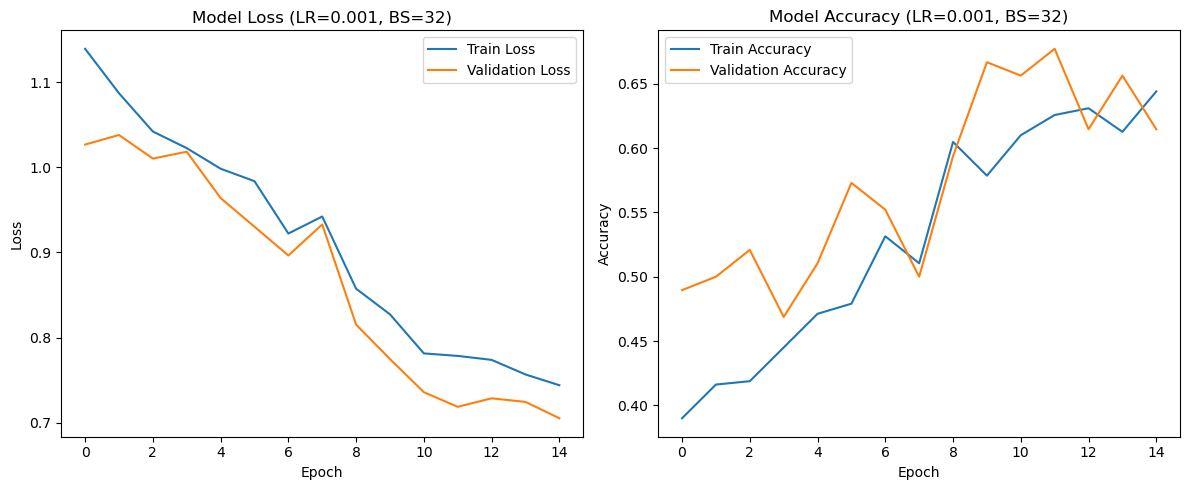

Testing Learning Rate: 0.001, Batch Size: 64
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step 
Metrics for LR=0.001, BS=64:
Accuracy: 0.6875
Precision: 0.7204
Recall: 0.6875
F1 Score: 0.6758
Log Loss: 0.7621


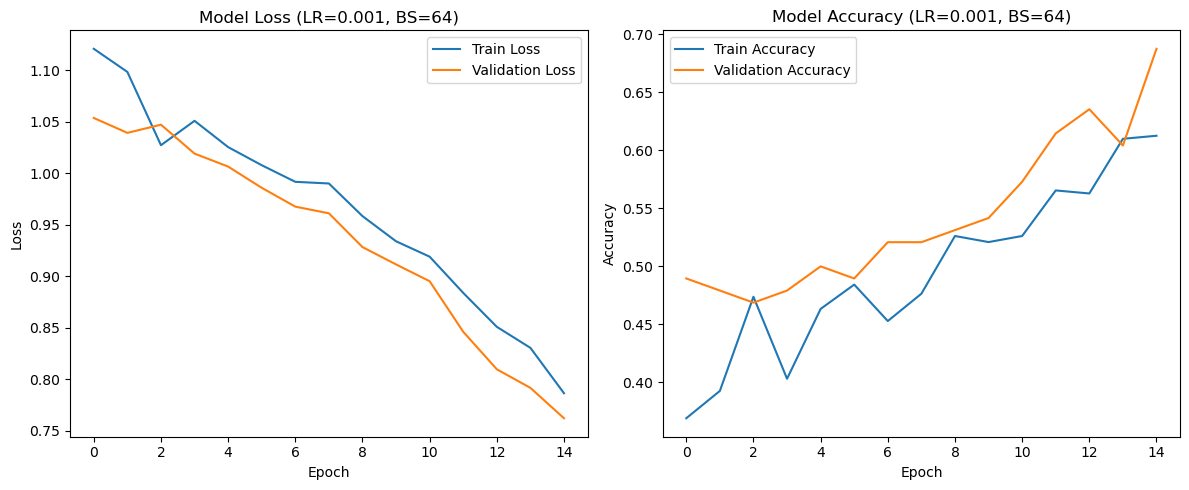

Testing Learning Rate: 0.001, Batch Size: 128
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step  
Metrics for LR=0.001, BS=128:
Accuracy: 0.5625
Precision: 0.6010
Recall: 0.5625
F1 Score: 0.5309
Log Loss: 0.9305


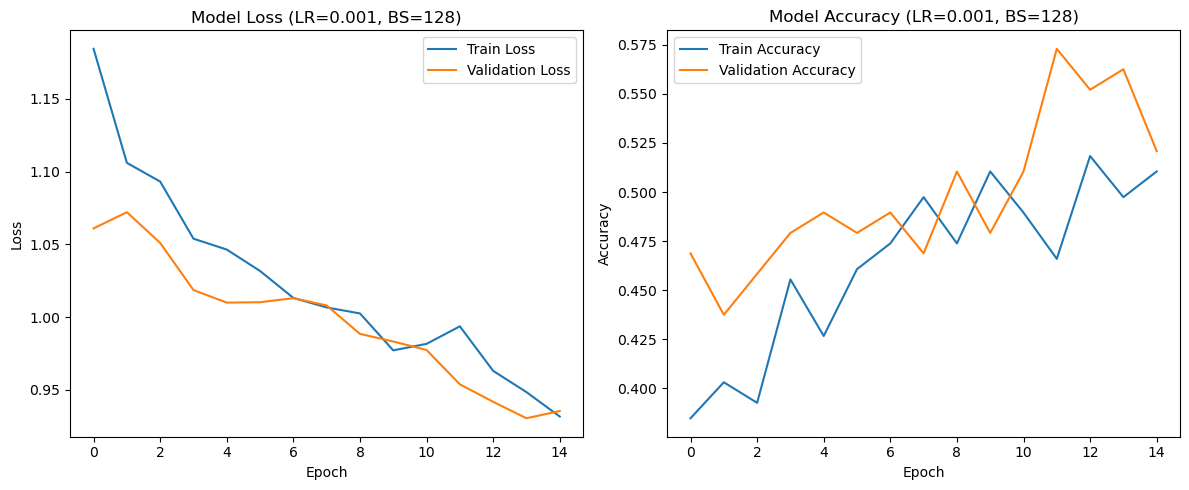

Testing Learning Rate: 0.005, Batch Size: 32
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step  
Metrics for LR=0.005, BS=32:
Accuracy: 0.6875
Precision: 0.6863
Recall: 0.6875
F1 Score: 0.6854
Log Loss: 0.6617


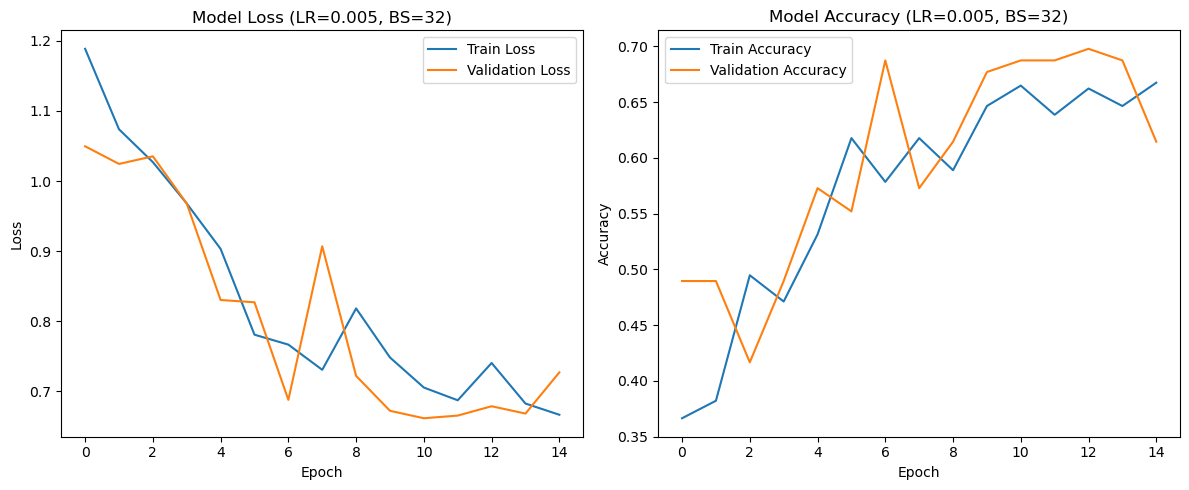

Testing Learning Rate: 0.005, Batch Size: 64
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step 
Metrics for LR=0.005, BS=64:
Accuracy: 0.7083
Precision: 0.7231
Recall: 0.7083
F1 Score: 0.7017
Log Loss: 0.6659


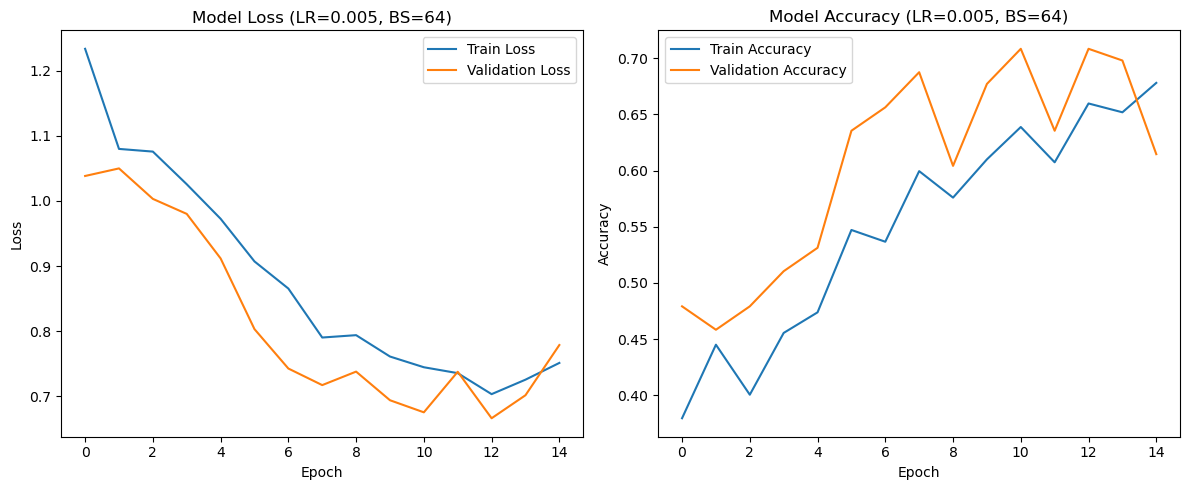

Testing Learning Rate: 0.005, Batch Size: 128
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step 
Metrics for LR=0.005, BS=128:
Accuracy: 0.6667
Precision: 0.7456
Recall: 0.6667
F1 Score: 0.6396
Log Loss: 0.7415


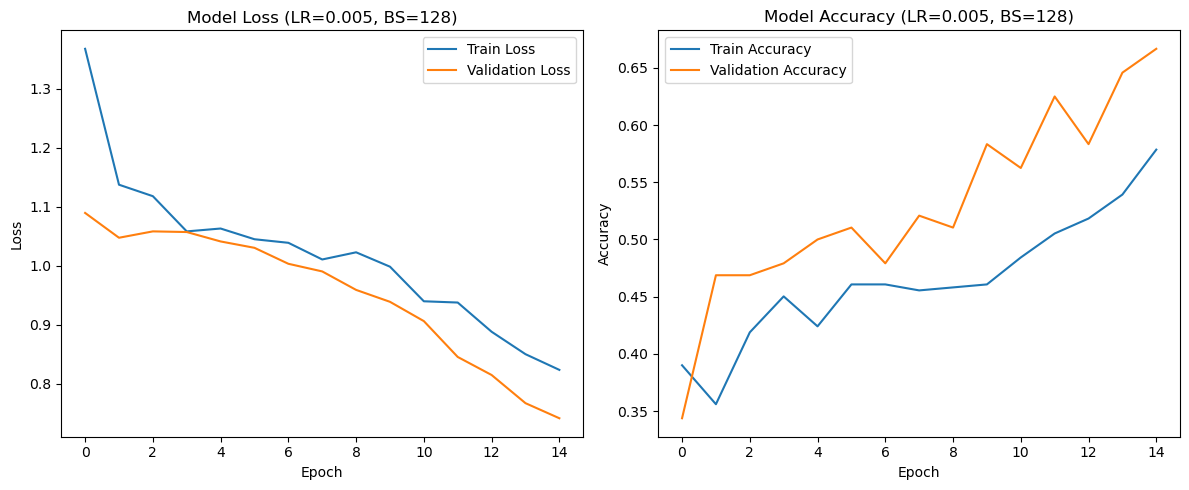

Testing Learning Rate: 0.01, Batch Size: 32
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step 
Metrics for LR=0.01, BS=32:
Accuracy: 0.6979
Precision: 0.7186
Recall: 0.6979
F1 Score: 0.6915
Log Loss: 0.6707


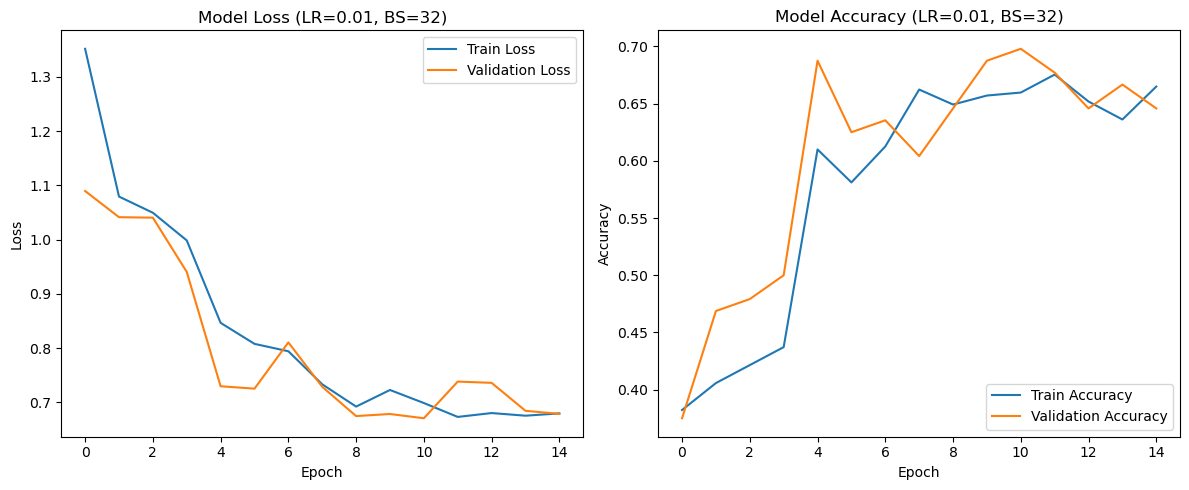

Testing Learning Rate: 0.01, Batch Size: 64
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step 
Metrics for LR=0.01, BS=64:
Accuracy: 0.6875
Precision: 0.6876
Recall: 0.6875
F1 Score: 0.6821
Log Loss: 0.6641


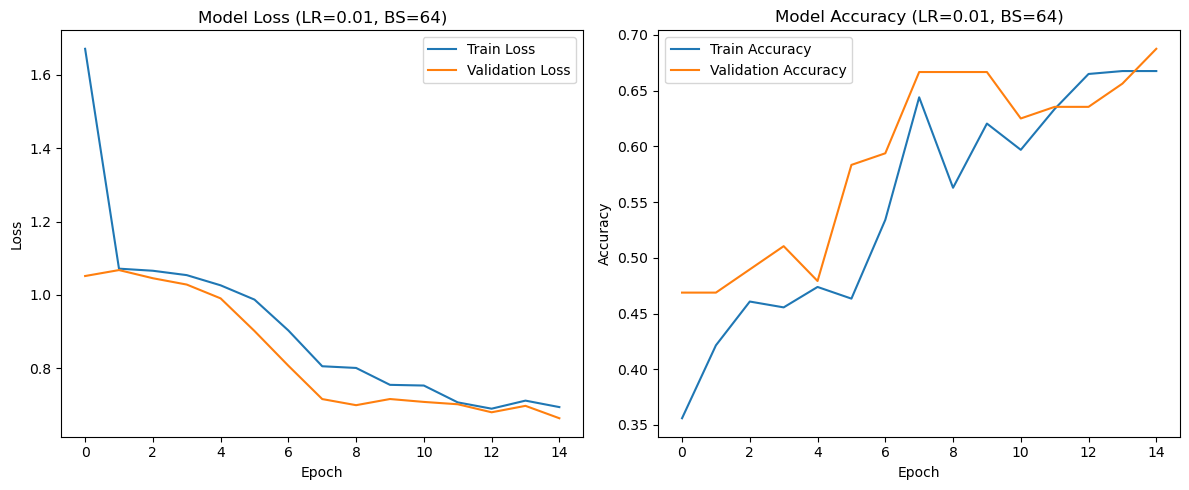

Testing Learning Rate: 0.01, Batch Size: 128
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step  
Metrics for LR=0.01, BS=128:
Accuracy: 0.6562
Precision: 0.7083
Recall: 0.6562
F1 Score: 0.6350
Log Loss: 0.7359


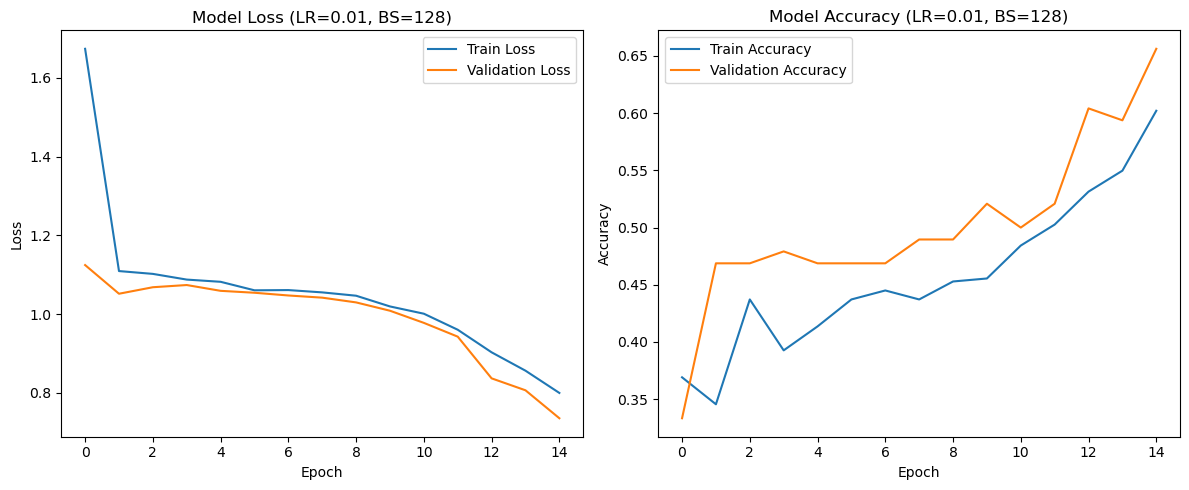

Best Hyperparameters: Learning Rate = 0.005, Batch Size = 64
Best Accuracy: 0.7083
Best Precision: 0.7231
Best Recall: 0.7083
Best F1 Score: 0.7017
Best Log Loss: 0.6659


In [814]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score, log_loss
from tensorflow.keras.layers import Input, Dense, Dropout, Reshape, Conv1D, MaxPooling1D, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam

# Define the hyperparameter values
learning_rates = [0.001, 0.005, 0.01]
batch_sizes = [32, 64, 128]

# Train the model
def build_and_train_model(learning_rate, batch_size):
    model2 = Sequential([
        Input(shape=(X_train.shape[1], 1)), 
        Reshape((X_train.shape[1], 1)), 
        Conv1D(64, kernel_size=3, activation='relu'),
        MaxPooling1D(pool_size=2),
        Conv1D(128, kernel_size=3, activation='relu'),
        MaxPooling1D(pool_size=2),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(num_classes, activation='softmax')
    ])

    # Compile the model
    model2.compile(
        loss='sparse_categorical_crossentropy',
        optimizer=Adam(learning_rate=learning_rate),
        metrics=['accuracy']
    )

    # Handling Overfitting
    early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
    
    history2 = model2.fit(
        X_train, y_train,
        epochs=15,
        batch_size=batch_size,
        validation_data=(X_val, y_val),
        callbacks=[early_stopping],
        verbose=0
    )
    
    eval_result = model2.evaluate(X_val, y_val, verbose=0)
    
    # Predict on validation data
    y_val_pred_proba = model2.predict(X_val)
    
    # Convert probabilities to class predictions
    y_val_pred = np.argmax(y_val_pred_proba, axis=1)
    y_val_true = y_val

    # Calculate metrics
    accuracy = np.mean(y_val_pred == y_val)
    precision = precision_score(y_val_true, y_val_pred, average='weighted')
    recall = recall_score(y_val_true, y_val_pred, average='weighted')
    f1 = f1_score(y_val_true, y_val_pred, average='weighted')
    loss = log_loss(y_val_true, y_val_pred_proba)
    
    print(f"Metrics for LR={learning_rate}, BS={batch_size}:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"Log Loss: {loss:.4f}")
    
    return accuracy, precision, recall, f1, loss, history2 

# Initialize values
best_accuracy = 0
best_metrics = None
best_hyperparameters = None

# hyperparameter tuning
for lr in learning_rates:
    for bs in batch_sizes:
        print(f"Testing Learning Rate: {lr}, Batch Size: {bs}")
        accuracy, precision, recall, f1, loss, history2 = build_and_train_model(lr, bs)

        # Plot loss and accuracy
        plt.figure(figsize=(12, 5))

        plt.subplot(1, 2, 1)
        plt.plot(history2.history['loss'], label='Train Loss')
        plt.plot(history2.history['val_loss'], label='Validation Loss')
        plt.title(f'Model Loss (LR={lr}, BS={bs})')
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.legend()

        plt.subplot(1, 2, 2)
        plt.plot(history2.history['accuracy'], label='Train Accuracy')
        plt.plot(history2.history['val_accuracy'], label='Validation Accuracy')
        plt.title(f'Model Accuracy (LR={lr}, BS={bs})')
        plt.xlabel('Epoch')
        plt.ylabel('Accuracy')
        plt.legend()

        plt.tight_layout()
        plt.show()

        # Find the best performance
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_metrics = (precision, recall, f1, loss)
            best_hyperparameters = (lr, bs)

# Display the best hyperparameters and metrics
print(f"Best Hyperparameters: Learning Rate = {best_hyperparameters[0]}, Batch Size = {best_hyperparameters[1]}")
print(f"Best Accuracy: {best_accuracy:.4f}")
print(f"Best Precision: {best_metrics[0]:.4f}")
print(f"Best Recall: {best_metrics[1]:.4f}")
print(f"Best F1 Score: {best_metrics[2]:.4f}")
print(f"Best Log Loss: {best_metrics[3]:.4f}")